In [33]:
from itertools import combinations

import pandas as pd

import csv

import glob

import os

import seaborn as sns

from sklearn import tree

from sklearn.datasets import load_iris

import pydotplus

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import numpy as np

from tqdm import tqdm

varidDurationPrefix = 'varied-'
constnatdurationPrefix = 'constant200-'

In [35]:
variedinputCSV = '/Users/mingshi/Desktop/Jupyter_dissertation-Project/Dataset/final-merge-all-varied-first-pass.csv'

constantCSVPath = '/Users/mingshi/Desktop/PythonProject/Range_alignment/final-merge-all-200ms-firstpass.csv'
data = pd.read_csv(variedinputCSV)

In [36]:
def flatten_list_of_lists(lst_of_lsts):
    return [item for sublist in lst_of_lsts for item in sublist]


def get_featureList_index() -> list[str]:
        file_paths = 'feature_name_list_compare.txt'
        filename = file_paths

        content_list = []

        with open(filename, 'r') as file:
            content_list = [line.strip() for line in file]

        feature_name_list = content_list

        return feature_name_list


In [37]:
# Nan-laughter checking
nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check
#Correctedd fixed

query_result = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'M002_S07') &
    (data['Start Time - ms'] == 313464) &
    (data['End Time - ms'] == 314672)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
    #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------   
#row 2
query_result2 = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'P017') &
    (data['Start Time - ms'] == 313354) &
    (data['End Time - ms'] == 313477)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result2.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
      #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------  
 #row 3
query_result3 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'M003_S20') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result3.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'
    
#row 4 corrected ness
query_result4 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'P043') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result4.index:
    data.at[idx, 'CV - merge - M - L - S'] ='[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'

nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check
# Transforming any concise merge type containing "null" into Ambiguous
data.loc[data['concise merge type'].str.contains('null'), 'concise merge type'] = 'Ambiguous'
discoueseV= '[laugh]-Discourse [V]'
discourseS =  '[laugh]-Discourse S'
discoureLaugh = '[laugh]-Discourse'
data['concise merge type'] = data['concise merge type'].replace(discoueseV, discoureLaugh)
data['concise merge type'] = data['concise merge type'].replace(discourseS, discoureLaugh)

In [38]:
responseList = set(data['concise merge type'].tolist())
responseList

{'Ambiguous',
 'M',
 'S',
 'Silience',
 '[V]',
 '[laugh]-Discourse',
 '[laugh]-Mirthful'}

 process the paricipant column of datafame if the value cotain "M" transform it into 0 and value contain "P" to "1"

In [39]:
data

Session id Participant id  Start Time - ms  End Time - ms  \
0            S02           P007                0           8812   
1            S02           P007             8812           9380   
2            S02           P007             9380          18149   
3            S02           P007            18149          18620   
4            S02           P007            18620          44627   
...          ...            ...              ...            ...   
14436        S23           P049           357649         361628   
14437        S23           P049           361628         361883   
14438        S23           P049           361883         363365   
14439        S23           P049           363365         363828   
14440        S23           P049           363828         365917   

       Duration - ms CV - merge - M - L - S concise merge type  \
0               8812               Silience           Silience   
1                568                      V                  S   
2               8769               Silience           Silience   
3                471                      V                  S   
4              26007               Silience           Silience   
...              ...                    ...                ...   
14436           3979               Silience           Silience   
14437            255                      V                  S   
14438           1482               Silience           Silience   
14439            463                      V                  S   
14440           2089               Silience           Silience   

       audspec_lengthL1norm_sma_range  audspec_lengthL1norm_sma_maxPos  \
0                            0.601711                         0.359268   
1                            0.458016                         0.673469   
2                            0.348826                         0.000000   
3                            1.032122                         0.375000   
4                            0.425555                         0.023911   
...                               ...                              ...   
14436                        1.614275                         0.353846   
14437                        1.109623                         0.555556   
14438                        0.394520                         0.007092   
14439                        2.253242                         0.794872   
14440                        0.633792                         0.000000   

       audspec_lengthL1norm_sma_minPos  ...  mfcc_sma_de[14]_peakRangeAbs  \
0                             0.092677  ...                      7.551740   
1                             0.122449  ...                      6.117432   
2                             0.234753  ...                      5.307438   
3                             0.025000  ...                      3.362701   
4                             0.177015  ...                      7.156795   
...                                ...  ...                           ...   
14436                         0.887179  ...                      4.958942   
14437                         0.000000  ...                      0.000000   
14438                         0.737589  ...                      4.935449   
14439                         0.128205  ...                      3.618804   
14440                         0.985075  ...                      5.561443   

       mfcc_sma_de[14]_peakRangeRel  mfcc_sma_de[14]_peakMeanAbs  \
0                          0.609021                     2.001329   
1                          0.692077                     1.598350   
2                          0.441913                     2.102095   
3                          0.370775                     3.013800   
4                          0.576666                     2.056919   
...                             ...                          ...   
14436                      0.473761                     2.045455   
14437                      0.000000               

In [40]:
data

Session id Participant id  Start Time - ms  End Time - ms  \
0            S02           P007                0           8812   
1            S02           P007             8812           9380   
2            S02           P007             9380          18149   
3            S02           P007            18149          18620   
4            S02           P007            18620          44627   
...          ...            ...              ...            ...   
14436        S23           P049           357649         361628   
14437        S23           P049           361628         361883   
14438        S23           P049           361883         363365   
14439        S23           P049           363365         363828   
14440        S23           P049           363828         365917   

       Duration - ms CV - merge - M - L - S concise merge type  \
0               8812               Silience           Silience   
1                568                      V                  S   
2               8769               Silience           Silience   
3                471                      V                  S   
4              26007               Silience           Silience   
...              ...                    ...                ...   
14436           3979               Silience           Silience   
14437            255                      V                  S   
14438           1482               Silience           Silience   
14439            463                      V                  S   
14440           2089               Silience           Silience   

       audspec_lengthL1norm_sma_range  audspec_lengthL1norm_sma_maxPos  \
0                            0.601711                         0.359268   
1                            0.458016                         0.673469   
2                            0.348826                         0.000000   
3                            1.032122                         0.375000   
4                            0.425555                         0.023911   
...                               ...                              ...   
14436                        1.614275                         0.353846   
14437                        1.109623                         0.555556   
14438                        0.394520                         0.007092   
14439                        2.253242                         0.794872   
14440                        0.633792                         0.000000   

       audspec_lengthL1norm_sma_minPos  ...  mfcc_sma_de[14]_peakRangeAbs  \
0                             0.092677  ...                      7.551740   
1                             0.122449  ...                      6.117432   
2                             0.234753  ...                      5.307438   
3                             0.025000  ...                      3.362701   
4                             0.177015  ...                      7.156795   
...                                ...  ...                           ...   
14436                         0.887179  ...                      4.958942   
14437                         0.000000  ...                      0.000000   
14438                         0.737589  ...                      4.935449   
14439                         0.128205  ...                      3.618804   
14440                         0.985075  ...                      5.561443   

       mfcc_sma_de[14]_peakRangeRel  mfcc_sma_de[14]_peakMeanAbs  \
0                          0.609021                     2.001329   
1                          0.692077                     1.598350   
2                          0.441913                     2.102095   
3                          0.370775                     3.013800   
4                          0.576666                     2.056919   
...                             ...                          ...   
14436                      0.473761                     2.045455   
14437                      0.000000               

Finishing preprceossng

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

import textwrap
session_ids = ['S02', 'S03', 'S04', 'S05', 'S07', 'S08', 'S09', 'S10', 'S11',
                       'S13', 'S14', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23']

discoureLaugh = '[laugh]-Discourse'
mirthfulLaugh = '[laugh]-Mirthful'

target_types = ['S', discoureLaugh, mirthfulLaugh]
sessionIdIndexName = 'Session id'
startTimeIndexName = 'Start Time - ms'
endTimeIndexName = 'End Time - ms'

# Exlore pattern : not run if capacity constriant

In [41]:
for i in session_ids:
    datasessionId = data[data[sessionIdIndexName] == i]
    
    for j in target_types:
        utteranceTypeInsessiondf = datasessionId[datasessionId['concise merge type'] == j]
        
        if not utteranceTypeInsessiondf.empty:
            utteranceTypeInsessiondf = utteranceTypeInsessiondf.sort_values(by=[startTimeIndexName])
            
            plt.figure()
            times = []  
            values = []  
            
            for index, row in utteranceTypeInsessiondf.iterrows():
                start_time = int(row[startTimeIndexName]) / 1000  # Convert to seconds
                end_time = int(row[endTimeIndexName]) / 1000  # Convert to seconds
                feature_name = 'audspecRasta_lengthL1norm_sma_amean'
                feature_value = row[feature_name]
                
       
                times.extend([start_time, end_time])
                values.extend([feature_value, feature_value])
                
              
                plt.plot([start_time, end_time], [feature_value, feature_value], 'o', color='red', markerfacecolor='none', markeredgewidth=2)

            if times and values:
                plt.plot(times, values, '-', color='yellow')
            
          
            title_text = f'In Session id: {i}, the time slot for {feature_name} for {j}'
            wrapped_title = '\n'.join(textwrap.wrap(title_text, width=60))  # Adjust width as needed
            
            plt.title(wrapped_title)
            plt.xlabel('Time (seconds)')
            plt.ylabel('The quantity of the acoustic feature')
            
            plt.savefig(f'session_{i}_target_{j}_{feature_name}_combined.png')
            plt.close()

# Invidual test: S3  mfcc_sma_de[1]_range

In [10]:
import matplotlib.pyplot as plt
import textwrap
session_ids = ['S03'] 
colors = ['red', 'green', 'blue'] 
legend_labels = []  

plt.figure(figsize=(10, 6))  

for i in session_ids:
    datasessionId = data[data[sessionIdIndexName] == i]
    
    for j, color in zip(target_types, colors):
        utteranceTypeInsessiondf = datasessionId[datasessionId['concise merge type'] == j]
        
        if not utteranceTypeInsessiondf.empty:
            utteranceTypeInsessiondf = utteranceTypeInsessiondf.sort_values(by=[startTimeIndexName])
            
            times = []  
            values = []  
            
            for index, row in utteranceTypeInsessiondf.iterrows():
                start_time = int(row[startTimeIndexName]) / 1000  # Convert to seconds
                end_time = int(row[endTimeIndexName]) / 1000  # Convert to seconds
                feature_name = 'mfcc_sma_de[1]_range'
                feature_value = row[feature_name]
                
                times.extend([start_time, end_time])
                values.extend([feature_value, feature_value])
                
                plt.plot([start_time, end_time], [feature_value, feature_value], 'o', color=color, markerfacecolor='none', markeredgewidth=2)
            
            if times and values:
                plt.plot(times, values, '-', color=color, label=j if j not in legend_labels else "")
                if j not in legend_labels:  # Add to legend_labels if it's not already there
                    legend_labels.append(j)

title_text = 'In Session 3,the time series plot of mfcc_sma_de[1]_range in three utterance events '
wrapped_title = '\n'.join(textwrap.wrap(title_text, width=60))  # Adjust width as needed

plt.title(wrapped_title)
plt.xlabel('Time (seconds)')
plt.ylabel('W/Hz')
plt.legend(title="Utterance type")

plt.savefig('S03_mfcc_threeEvent.png')
plt.show()

# Invidual test: S3  audspecRasta_lengthL1norm_sma_amean

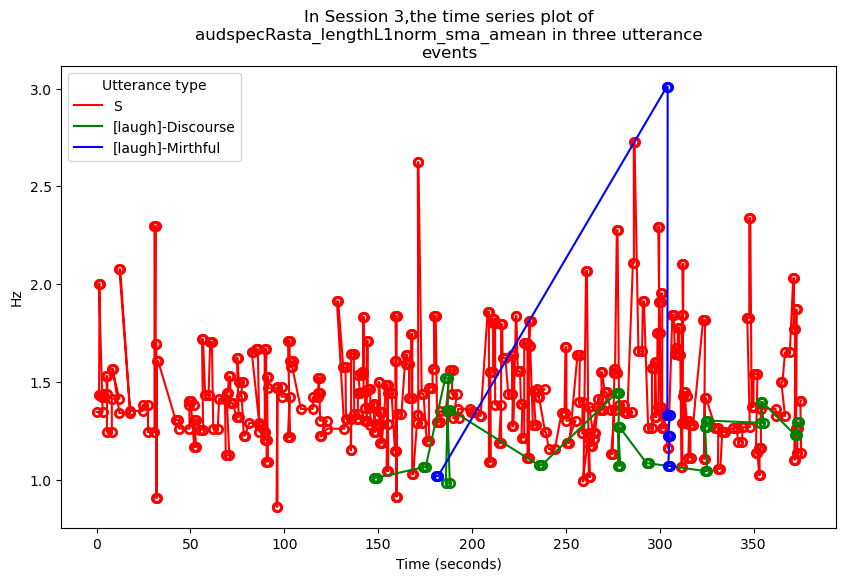

In [11]:
import matplotlib.pyplot as plt
import textwrap

session_ids = ['S03']  
colors = ['red', 'green', 'blue']  
legend_labels = []  

plt.figure(figsize=(10, 6))  

for i in session_ids:
    datasessionId = data[data[sessionIdIndexName] == i]
    
    for j, color in zip(target_types, colors):
        utteranceTypeInsessiondf = datasessionId[datasessionId['concise merge type'] == j]
        
        if not utteranceTypeInsessiondf.empty:
            utteranceTypeInsessiondf = utteranceTypeInsessiondf.sort_values(by=[startTimeIndexName])
            
            times = []  
            values = []  
            
            for index, row in utteranceTypeInsessiondf.iterrows():
                start_time = int(row[startTimeIndexName]) / 1000  # Convert to seconds
                end_time = int(row[endTimeIndexName]) / 1000  # Convert to seconds
                feature_name = 'audspecRasta_lengthL1norm_sma_amean'
                feature_value = row[feature_name]
                
                times.extend([start_time, end_time])
                values.extend([feature_value, feature_value])
                
                plt.plot([start_time, end_time], [feature_value, feature_value], 'o', color=color, markerfacecolor='none', markeredgewidth=2)
            
            if times and values:
                plt.plot(times, values, '-', color=color, label=j if j not in legend_labels else "")
                if j not in legend_labels: 
                    legend_labels.append(j)

title_text = 'In Session 3,the time series plot of audspecRasta_lengthL1norm_sma_amean in three utterance events'
wrapped_title = '\n'.join(textwrap.wrap(title_text, width=60))  

plt.title(wrapped_title)
plt.xlabel('Time (seconds)')
plt.ylabel('Hz')
plt.legend(title="Utterance type")

plt.savefig('S03_auditorySpecturm_threeEvent.png')
plt.show()

# Add more experiment to test here

In [41]:

dataSession3=data[data[sessionIdIndexName] == 'S03']

In [42]:
discoureLaugh = '[laugh]-Discourse'
mirthfulLaugh = '[laugh]-Mirthful'
SpokenWords = 'S'


In [43]:
dataSession3

Session id Participant id  Start Time - ms  End Time - ms  Duration - ms  \
998         S03           P008                0           1230           1230   
999         S03           P008             1230           1592            362   
1000        S03           P008             1592           5229           3637   
1001        S03           P008             5229           5743            514   
1002        S03           P008             5743          12152           6409   
...         ...            ...              ...            ...            ...   
1492        S03           P009           366499         371723           5224   
1493        S03           P009           371723         372080            357   
1494        S03           P009           372080         372628            548   
1495        S03           P009           372628         373505            877   
1496        S03           P009           373505         375342           1837   

     CV - merge - M - L - S concise merge type  \
998                Silience           Silience   
999                       V                  S   
1000               Silience           Silience   
1001                      V                  S   
1002               Silience           Silience   
...                     ...                ...   
1492               Silience           Silience   
1493                      V                  S   
1494               Silience           Silience   
1495                     V.                  S   
1496               Silience           Silience   

      audspec_lengthL1norm_sma_range  audspec_lengthL1norm_sma_maxPos  \
998                         0.647790                         0.482759   
999                         2.316192                         0.551724   
1000                        0.521856                         0.050562   
1001                        1.041881                         0.636364   
1002                        0.395040                         0.587678   
...                              ...                              ...   
1492                        0.198320                         0.221359   
1493                        0.143154                         0.250000   
1494                        0.091844                         0.319149   
1495                        0.666192                         0.900000   
1496                        0.208590                         0.079545   

      audspec_lengthL1norm_sma_minPos  ...  mfcc_sma_de[14]_peakRangeAbs  \
998                          0.293103  ...                      4.962650   
999                          0.000000  ...                      0.000000   
1000                         0.286517  ...                      6.772765   
1001                         0.954545  ...                      1.736817   
1002                         0.377567  ...                      7.589944   
...                               ...  ...                           ...   
1492                         0.353398  ...                      7.632159   
1493                         0.571429  ...                      1.002284   
1494                         0.765957  ...                      3.091591   
1495                         0.487500  ...                      3.955284   
1496                         0.613636  ...                      5.588122   

      mfcc_sma_de[14]_peakRangeRel  mfcc_sma_de[14]_peakMeanAbs  \
998                       0.593526                     2.023119   
999                       0.000000                     3.699997   
1000                      0.645893                     2.072815   
1001                      0.193142                     2.706600   
1002                      0.697597                     2.064184   
...                            ...                          ...   
1492                      0.619310                     2.096114   
1493                      0.181379                     1.830986   
1494                      0.291136    

In [44]:
session3Mirthful = dataSession3[dataSession3['concise merge type']==mirthfulLaugh]

In [24]:
 feature_name = 'audspecRasta_lengthL1norm_sma_amean'

In [45]:
session3MirthfulWithFeature = session3Mirthful[['Start Time - ms','End Time - ms',
                                               'Duration - ms',feature_name]]

In [46]:
session3MirthfulWithFeature

Start Time - ms  End Time - ms  Duration - ms  \
1099           180633         181879           1246   
1182           304485         305357            872   
1312           303763         304223            460   
1314           304498         305672           1174   
1467           304058         305359           1301   

      audspecRasta_lengthL1norm_sma_amean  
1099                             1.017238  
1182                             1.223295  
1312                             3.009670  
1314                             1.070242  
1467                             1.329517

In [48]:
 feature_name = 'audspecRasta_lengthL1norm_sma_amean'

/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_72229/2902366177.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Time - s'] = df['Start Time - ms'] / 1000
/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_72229/2902366177.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End Time - s'] = df['End Time - ms'] / 1000
/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_72229/2902366177.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

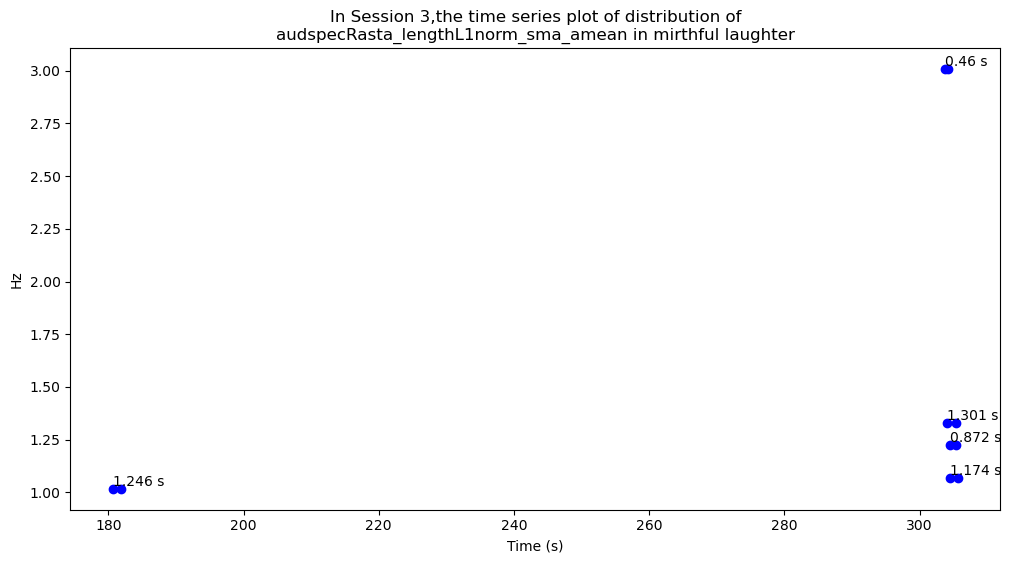

<Figure size 640x480 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt

df = session3Mirthful

df['Start Time - s'] = df['Start Time - ms'] / 1000
df['End Time - s'] = df['End Time - ms'] / 1000
df['Duration - s'] = df['Duration - ms'] / 1000  
plt.figure(figsize=(12, 6))


for _, row in df.iterrows():
    plt.plot([row['Start Time - s'], row['End Time - s']], [row[feature_name], row[feature_name]], '-o', color='blue')

    # Place the duration label at the start of the interval, now using seconds
    plt.text(row['Start Time - s'], row[feature_name], f"{row['Duration - s']} s", verticalalignment='bottom', horizontalalignment='left')

plt.xlabel('Time (s)') 
plt.ylabel('Hz')
title_text = 'In Session 3,the time series plot of distribution of audspecRasta_lengthL1norm_sma_amean in mirthful laughter'
wrapped_title = '\n'.join(textwrap.wrap(title_text, width=60))  

plt.title(wrapped_title)

plt.grid(False)  

plt.show()  
plt.savefig('S03_auditorySpecturm_MirthfulDurationTimeSeries.png')
plt.show()


# Spoken word

In [ ]:
colors = ['red', 'green', 'blue']  

In [111]:
session3discouse = dataSession3[dataSession3['concise merge type']==discoureLaugh]
session3discouseWithFeature = session3discouse[['Start Time - ms','End Time - ms',
                                               'Duration - ms',feature_name]]

In [112]:
session3discouseWithFeature

Start Time - ms  End Time - ms  Duration - ms  \
1073           147916         149216           1300   
1103           185740         187426           1686   
1133           235600         237111           1511   
1163           277833         278728            895   
1172           293055         294279           1224   
1203           324623         325437            814   
1220           353249         355366           2117   
1227           373010         374093           1083   
1268           174133         175253           1120   
1270           186826         188462           1636   
1299           277201         278312           1111   
1327           324129         325017            888   
1336           372310         373200            890   
1415           186019         188156           2137   
1454           277767         278945           1178   
1476           323916         325233           1317   
1489           353954         354552            598   

      audspecRasta_lengthL1norm_sma_amean  
1073                             1.009441  
1103                             1.518664  
1133                             1.073375  
1163                             1.266451  
1172                             1.082924  
1203                             1.302041  
1220                             1.290399  
1227                             1.292462  
1268                             1.063082  
1270                             1.357703  
1299                             1.445260  
1327                             1.270904  
1336                             1.226398  
1415                             0.980692  
1454                             1.070954  
1476                             1.044039  
1489                             1.397264

/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_72229/3521085701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Time - s'] = df['Start Time - ms'] / 1000
/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_72229/3521085701.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End Time - s'] = df['End Time - ms'] / 1000
/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_72229/3521085701.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

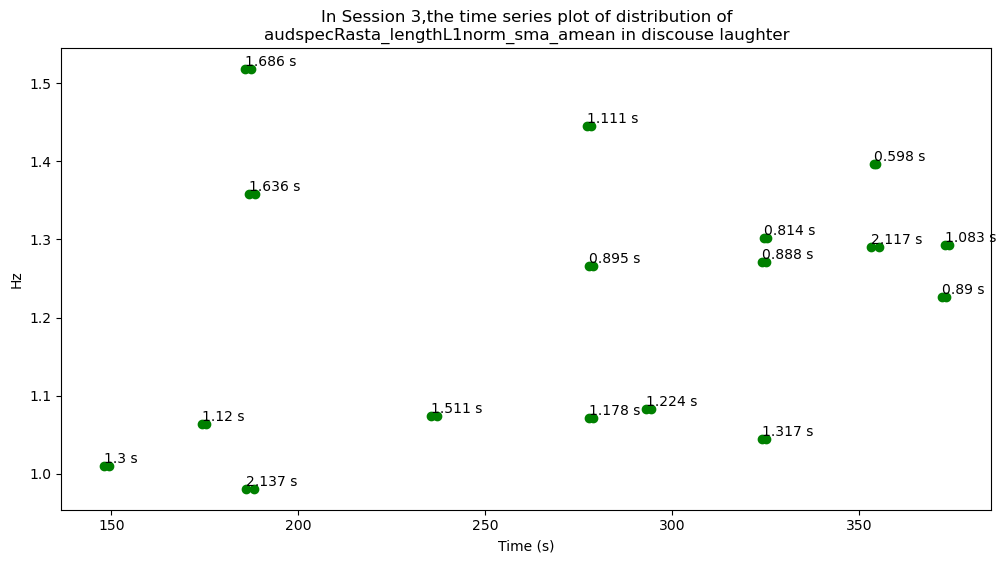

<Figure size 640x480 with 0 Axes>

In [114]:
import matplotlib.pyplot as plt

df = session3discouseWithFeature

df['Start Time - s'] = df['Start Time - ms'] / 1000
df['End Time - s'] = df['End Time - ms'] / 1000
df['Duration - s'] = df['Duration - ms'] / 1000  
plt.figure(figsize=(12, 6))


for _, row in df.iterrows():
    plt.plot([row['Start Time - s'], row['End Time - s']], [row[feature_name], row[feature_name]], '-o', color='green')

    # Place the duration label at the start of the interval, now using seconds
    plt.text(row['Start Time - s'], row[feature_name], f"{row['Duration - s']} s", verticalalignment='bottom', horizontalalignment='left')

plt.xlabel('Time (s)') 
plt.ylabel('Hz')
title_text = 'In Session 3,the time series plot of distribution of audspecRasta_lengthL1norm_sma_amean in discouse laughter'
wrapped_title = '\n'.join(textwrap.wrap(title_text, width=60))  

plt.title(wrapped_title)

plt.grid(False)  

plt.show()  
plt.savefig('S03_auditorySpecturm_DiscouseDurationTimeSeries.png')
plt.show()


# Spoken words

In [60]:
session3SpokenWords = dataSession3[dataSession3['concise merge type']==SpokenWords]
session3SpokenWordsWithFeature = session3SpokenWords[['Start Time - ms','End Time - ms',
                                               'Duration - ms',feature_name]]

In [61]:
session3SpokenWordsWithFeature

Start Time - ms  End Time - ms  Duration - ms  \
999              1230           1592            362   
1001             5229           5743            514   
1003            12152          12555            403   
1005            31440          31851            411   
1007            42114          43565           1451   
...               ...            ...            ...   
1484           344352         347983           3631   
1486           351207         352029            822   
1488           353086         353954            868   
1493           371723         372080            357   
1495           372628         373505            877   

      audspecRasta_lengthL1norm_sma_amean  
999                              2.001892  
1001                             1.529558  
1003                             2.075990  
1005                             1.694935  
1007                             1.304782  
...                                   ...  
1484                             1.267817  
1486                             1.134487  
1488                             1.161784  
1493                             1.102042  
1495                             1.263967  

[227 rows x 4 columns]

/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_72229/3238127045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Time - s'] = df['Start Time - ms'] / 1000
/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_72229/3238127045.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End Time - s'] = df['End Time - ms'] / 1000
/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_72229/3238127045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

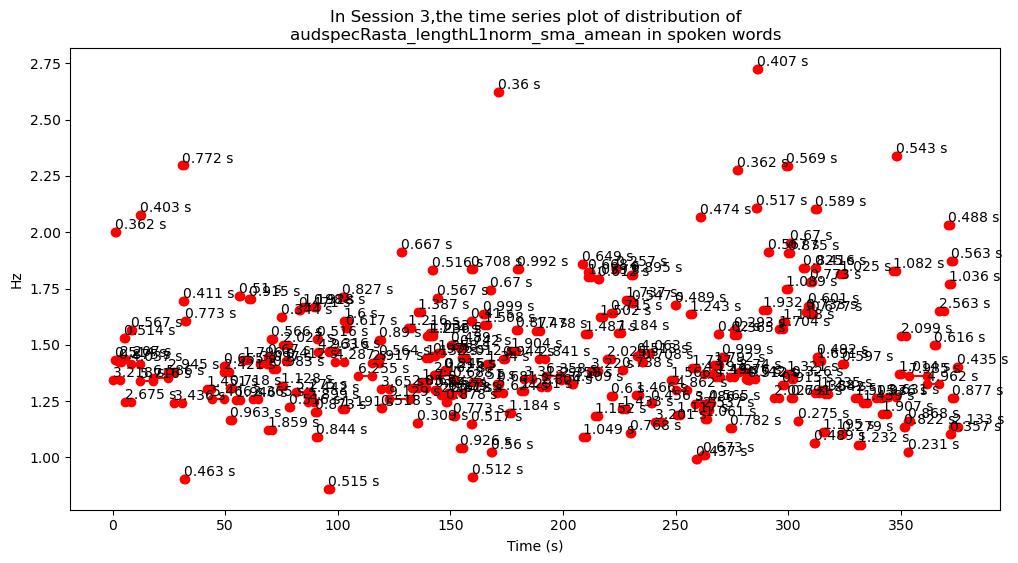

<Figure size 640x480 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt

df = session3SpokenWordsWithFeature

df['Start Time - s'] = df['Start Time - ms'] / 1000
df['End Time - s'] = df['End Time - ms'] / 1000
df['Duration - s'] = df['Duration - ms'] / 1000  
plt.figure(figsize=(12, 6))


for _, row in df.iterrows():
    plt.plot([row['Start Time - s'], row['End Time - s']], [row[feature_name], row[feature_name]], '-o', color='red')

    # Place the duration label at the start of the interval, now using seconds
    plt.text(row['Start Time - s'], row[feature_name], f"{row['Duration - s']} s", verticalalignment='bottom', horizontalalignment='left')

plt.xlabel('Time (s)') 
plt.ylabel('Hz')
title_text = 'In Session 3,the time series plot of distribution of audspecRasta_lengthL1norm_sma_amean in spoken words'
wrapped_title = '\n'.join(textwrap.wrap(title_text, width=60))  

plt.title(wrapped_title)

plt.grid(False)  

plt.show()  
plt.savefig('S03_auditorySpecturm_SpokenwordsDurationTimeSeries.png')
plt.show()


# Duration distribution of   three utterance type 

In [115]:
session3Mirthful

Session id Participant id  Start Time - ms  End Time - ms  Duration - ms  \
1099        S03           P008           180633         181879           1246   
1182        S03           P008           304485         305357            872   
1312        S03       M001_S03           303763         304223            460   
1314        S03       M001_S03           304498         305672           1174   
1467        S03           P009           304058         305359           1301   

     CV - merge - M - L - S concise merge type  \
1099       [laugh]-Mirthful   [laugh]-Mirthful   
1182       [laugh]-Mirthful   [laugh]-Mirthful   
1312       [laugh]-Mirthful   [laugh]-Mirthful   
1314       [laugh]-Mirthful   [laugh]-Mirthful   
1467       [laugh]-Mirthful   [laugh]-Mirthful   

      audspec_lengthL1norm_sma_range  audspec_lengthL1norm_sma_maxPos  \
1099                        1.958859                         0.102564   
1182                        1.971084                         0.275000   
1312                        3.464661                         0.974359   
1314                        4.319641                         0.581818   
1467                        1.168547                         0.439024   

      audspec_lengthL1norm_sma_minPos  ...  mfcc_sma_de[14]_peakMeanMeanDist  \
1099                         0.572650  ...                          1.778779   
1182                         0.075000  ...                          1.959497   
1312                         0.076923  ...                          2.799937   
1314                         0.863636  ...                          2.168892   
1467                         0.000000  ...                          3.190294   

      mfcc_sma_de[14]_peakMeanRel  mfcc_sma_de[14]_minRangeRel  \
1099                   -15.940523                     0.571431   
1182                    18.748821                     0.466321   
1312                    -4.151599                     0.341935   
1314                   -14.957502                     0.769615   
1467                   -17.891785                     0.535677   

      mfcc_sma_de[14]_meanRisingSlope  mfcc_sma_de[14]_stddevRisingSlope  \
1099                        85.002480                          33.934216   
1182                        90.028824                          36.736710   
1312                       108.805962                          28.587715   
1314                       102.066002                          35.488262   
1467                       132.163788                          52.960899   

      mfcc_sma_de[14]_meanFallingSlope  mfcc_sma_de[14]_stddevFallingSlope  \
1099                         85.475349                           34.833813   
1182                         81.455177                           38.899582   
1312                         61.058678                           46.695755   
1314                         90.693123                           47.019447   
1467                        117.471199                           39.538448   

      Start Time - s  End Time - s  Duration - s  
1099         180.633       181.879         1.246  
1182         304.485       305.357         0.872  
1312         303.763       304.223         0.460  
1314         304.498       305.672         1.174  
1467         304.058       305.359         1.301  

[5 rows x 6383 columns]

In [120]:
session3discouseWithFeature
len(session3discouseWithFeature)

17

In [121]:
session3SpokenWordsWithFeature

Start Time - ms  End Time - ms  Duration - ms  \
999              1230           1592            362   
1001             5229           5743            514   
1003            12152          12555            403   
1005            31440          31851            411   
1007            42114          43565           1451   
...               ...            ...            ...   
1484           344352         347983           3631   
1486           351207         352029            822   
1488           353086         353954            868   
1493           371723         372080            357   
1495           372628         373505            877   

      audspecRasta_lengthL1norm_sma_amean  Start Time - s  End Time - s  \
999                              2.001892           1.230         1.592   
1001                             1.529558           5.229         5.743   
1003                             2.075990          12.152        12.555   
1005                             1.694935          31.440        31.851   
1007                             1.304782          42.114        43.565   
...                                   ...             ...           ...   
1484                             1.267817         344.352       347.983   
1486                             1.134487         351.207       352.029   
1488                             1.161784         353.086       353.954   
1493                             1.102042         371.723       372.080   
1495                             1.263967         372.628       373.505   

      Duration - s  
999          0.362  
1001         0.514  
1003         0.403  
1005         0.411  
1007         1.451  
...            ...  
1484         3.631  
1486         0.822  
1488         0.868  
1493         0.357  
1495         0.877  

[227 rows x 7 columns]

/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_72229/3161061636.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Duration - s'] = df1['Duration - ms'] / 1000
/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_72229/3161061636.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Duration - s'] = df2['Duration - ms'] / 1000
/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_72229/3161061636.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

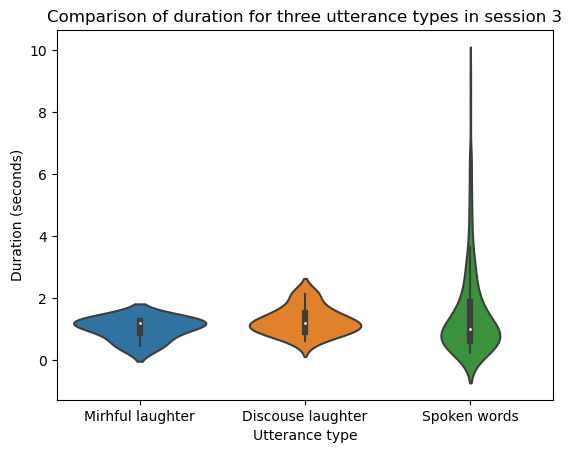

<Figure size 640x480 with 0 Axes>

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = session3Mirthful
df2 = session3discouseWithFeature
df3 = session3SpokenWordsWithFeature

df1['Duration - s'] = df1['Duration - ms'] / 1000
df2['Duration - s'] = df2['Duration - ms'] / 1000
df3['Duration - s'] = df3['Duration - ms'] / 1000

combined_df = pd.concat([df1['Duration - s'], df2['Duration - s'], df3['Duration - s']], axis=1)
combined_df.columns = ['Mirhful laughter', 'Discouse laughter', 'Spoken words']

# Create the violin plot
sns.violinplot(data=combined_df)
plt.xlabel('Utterance type')
plt.ylabel('Duration (seconds)')
plt.title('Comparison of duration for three utterance types in session 3')
plt.show()
plt.savefig('S03_vilonPlotDuration.png')
plt.show()

# Average duration

In [123]:
mirthfulAverageDuration = session3Mirthful['Duration - ms'].values

In [124]:
mirthfulAverageDuration

array([1246,  872,  460, 1174, 1301])

In [125]:
average_value = sum(mirthfulAverageDuration) / len(mirthfulAverageDuration)
average_value

1010.6

## discouse laughter avergae time

In [126]:
discouseAverageDuration = session3discouseWithFeature['Duration - ms'].values

In [127]:
session3discouseWithFeature

Start Time - ms  End Time - ms  Duration - ms  \
1073           147916         149216           1300   
1103           185740         187426           1686   
1133           235600         237111           1511   
1163           277833         278728            895   
1172           293055         294279           1224   
1203           324623         325437            814   
1220           353249         355366           2117   
1227           373010         374093           1083   
1268           174133         175253           1120   
1270           186826         188462           1636   
1299           277201         278312           1111   
1327           324129         325017            888   
1336           372310         373200            890   
1415           186019         188156           2137   
1454           277767         278945           1178   
1476           323916         325233           1317   
1489           353954         354552            598   

      audspecRasta_lengthL1norm_sma_amean  Start Time - s  End Time - s  \
1073                             1.009441         147.916       149.216   
1103                             1.518664         185.740       187.426   
1133                             1.073375         235.600       237.111   
1163                             1.266451         277.833       278.728   
1172                             1.082924         293.055       294.279   
1203                             1.302041         324.623       325.437   
1220                             1.290399         353.249       355.366   
1227                             1.292462         373.010       374.093   
1268                             1.063082         174.133       175.253   
1270                             1.357703         186.826       188.462   
1299                             1.445260         277.201       278.312   
1327                             1.270904         324.129       325.017   
1336                             1.226398         372.310       373.200   
1415                             0.980692         186.019       188.156   
1454                             1.070954         277.767       278.945   
1476                             1.044039         323.916       325.233   
1489                             1.397264         353.954       354.552   

      Duration - s  
1073         1.300  
1103         1.686  
1133         1.511  
1163         0.895  
1172         1.224  
1203         0.814  
1220         2.117  
1227         1.083  
1268         1.120  
1270         1.636  
1299         1.111  
1327         0.888  
1336         0.890  
1415         2.137  
1454         1.178  
1476         1.317  
1489         0.598

In [128]:
discouseAverageDuration

array([1300, 1686, 1511,  895, 1224,  814, 2117, 1083, 1120, 1636, 1111,
        888,  890, 2137, 1178, 1317,  598])

In [129]:
average_value = sum(discouseAverageDuration) / len(discouseAverageDuration)
average_value

1265.0

## Spoken words

In [130]:
session3SpokenWordsWithFeature

Start Time - ms  End Time - ms  Duration - ms  \
999              1230           1592            362   
1001             5229           5743            514   
1003            12152          12555            403   
1005            31440          31851            411   
1007            42114          43565           1451   
...               ...            ...            ...   
1484           344352         347983           3631   
1486           351207         352029            822   
1488           353086         353954            868   
1493           371723         372080            357   
1495           372628         373505            877   

      audspecRasta_lengthL1norm_sma_amean  Start Time - s  End Time - s  \
999                              2.001892           1.230         1.592   
1001                             1.529558           5.229         5.743   
1003                             2.075990          12.152        12.555   
1005                             1.694935          31.440        31.851   
1007                             1.304782          42.114        43.565   
...                                   ...             ...           ...   
1484                             1.267817         344.352       347.983   
1486                             1.134487         351.207       352.029   
1488                             1.161784         353.086       353.954   
1493                             1.102042         371.723       372.080   
1495                             1.263967         372.628       373.505   

      Duration - s  
999          0.362  
1001         0.514  
1003         0.403  
1005         0.411  
1007         1.451  
...            ...  
1484         3.631  
1486         0.822  
1488         0.868  
1493         0.357  
1495         0.877  

[227 rows x 7 columns]

In [131]:
SpokenwORDSAverageDuration = session3SpokenWordsWithFeature['Duration - ms'].values

In [132]:
average_value = sum(SpokenwORDSAverageDuration) / len(SpokenwORDSAverageDuration)
average_value

1515.8237885462554

# Occurance interval 

In [138]:
session3discouseWithFeature

Start Time - ms  End Time - ms  Duration - ms  \
1073           147916         149216           1300   
1103           185740         187426           1686   
1133           235600         237111           1511   
1163           277833         278728            895   
1172           293055         294279           1224   
1203           324623         325437            814   
1220           353249         355366           2117   
1227           373010         374093           1083   
1268           174133         175253           1120   
1270           186826         188462           1636   
1299           277201         278312           1111   
1327           324129         325017            888   
1336           372310         373200            890   
1415           186019         188156           2137   
1454           277767         278945           1178   
1476           323916         325233           1317   
1489           353954         354552            598   

      audspecRasta_lengthL1norm_sma_amean  Start Time - s  End Time - s  \
1073                             1.009441         147.916       149.216   
1103                             1.518664         185.740       187.426   
1133                             1.073375         235.600       237.111   
1163                             1.266451         277.833       278.728   
1172                             1.082924         293.055       294.279   
1203                             1.302041         324.623       325.437   
1220                             1.290399         353.249       355.366   
1227                             1.292462         373.010       374.093   
1268                             1.063082         174.133       175.253   
1270                             1.357703         186.826       188.462   
1299                             1.445260         277.201       278.312   
1327                             1.270904         324.129       325.017   
1336                             1.226398         372.310       373.200   
1415                             0.980692         186.019       188.156   
1454                             1.070954         277.767       278.945   
1476                             1.044039         323.916       325.233   
1489                             1.397264         353.954       354.552   

      Duration - s  
1073         1.300  
1103         1.686  
1133         1.511  
1163         0.895  
1172         1.224  
1203         0.814  
1220         2.117  
1227         1.083  
1268         1.120  
1270         1.636  
1299         1.111  
1327         0.888  
1336         0.890  
1415         2.137  
1454         1.178  
1476         1.317  
1489         0.598

In [140]:
df = pd.DataFrame(data)

intervals = [(0, 100000), (100000, 250000), (250000, 350000)]

def count_occurrences_in_intervals(df, intervals):
    counts = []
    for start, end in intervals:
        # 100 time toerlance
        adjusted_start, adjusted_end = start - 100, end + 100
        count = df[((df['Start Time - ms'] >= adjusted_start) & (df['Start Time - ms'] <= adjusted_end)) |
                   ((df['End Time - ms'] >= adjusted_start) & (df['End Time - ms'] <= adjusted_end))].shape[0]
        counts.append(count)
    return counts

occurrences_counts = count_occurrences_in_intervals(session3Mirthful, intervals)
occurrences_counts

[0, 1, 4]